# Linear Regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.nn import Module, Linear, MSELoss
from torch.optim import SGD
from torch.utils.data import Dataset, DataLoader

In [4]:
class plot_error_surfaces(object):
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30,30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Cost/Total Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Cost/Total Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
 
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W,self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w,self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))

        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Total Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

We know that a simple linear regression has the following equation:
$$\hat{y} = w\times x + b$$
where $w$ is the weight of a feature and $b$ is the bias. Let's say that the value of $w$ is $2$, and the value of $b$. Then the prediction for a new value $x$ will be
$$\hat{y} = 2\times x - 1$$
Now, we will calculate the same equation using `Tensor`. First we will initialize the weight and bias.

In [5]:
w = torch.tensor(2.0, requires_grad = True)
b = torch.tensor(-1.0, requires_grad = True)

Then we will define a function named `forward` to compute $\hat{y}$.

In [6]:
def forward(x):
    yhat = w * x + b
    return yhat

Then we will predict when $x = 1$.

In [7]:
x = torch.tensor([[1.0]])
yhat = forward(x)
print("The prediction: ", yhat)

The prediction:  tensor([[1.]], grad_fn=<AddBackward0>)


Now we will predict for multiple inputs.

In [8]:
x = torch.tensor([[1.0], [2.0]])
print("The shape of x: ", x.shape)

The shape of x:  torch.Size([2, 1])


In [9]:
yhat = forward(x)
print("The prediction: ", yhat)

The prediction:  tensor([[1.],
        [3.]], grad_fn=<AddBackward0>)


We can achieve the same thing that we have done so far using the `nn.Linear` class of PyTorch.

In [10]:
lr = Linear(in_features=1, out_features=1, bias=True)
print("Parameters w and b: ", list(lr.parameters()))

Parameters w and b:  [Parameter containing:
tensor([[0.5330]], requires_grad=True), Parameter containing:
tensor([-0.5515], requires_grad=True)]


A method  <code>state_dict()</code> Returns a Python dictionary object corresponding to each parameter tensor.

In [11]:
print("Python dictionary: ",lr.state_dict())
print("keys: ",lr.state_dict().keys())
print("values: ",lr.state_dict().values())

Python dictionary:  OrderedDict([('weight', tensor([[0.5330]])), ('bias', tensor([-0.5515]))])
keys:  odict_keys(['weight', 'bias'])
values:  odict_values([tensor([[0.5330]]), tensor([-0.5515])])


The keys correspond to the name of the attributes and the values correspond to the parameter value.

In [12]:
print("weight:", lr.weight)
print("bias:", lr.bias)

weight: Parameter containing:
tensor([[0.5330]], requires_grad=True)
bias: Parameter containing:
tensor([-0.5515], requires_grad=True)


Now, we will make a signle prediction when $x = 1$.

In [13]:
x = torch.tensor([[1.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[-0.0185]], grad_fn=<AddmmBackward0>)


We can also make predictions when we have multiple input values.

In [14]:
x = torch.tensor([[1.0], [2.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[-0.0185],
        [ 0.5145]], grad_fn=<AddmmBackward0>)


# Model
We can make a custom module to implement the linear regression model.

In [16]:
class LinearRegression(Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = Linear(input_size, output_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [17]:
lr = LinearRegression(1, 1)
print("The parameters: ", list(lr.parameters()))
print("Linear model: ", lr.linear)

The parameters:  [Parameter containing:
tensor([[-0.5043]], requires_grad=True), Parameter containing:
tensor([-0.0062], requires_grad=True)]
Linear model:  Linear(in_features=1, out_features=1, bias=True)


We will make prediction when we have only single input.

In [18]:
x = torch.tensor([[1.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[-0.5106]], grad_fn=<AddmmBackward0>)


We will make predictions when we have multiple samples.

In [19]:
x = torch.tensor([[1.0], [2.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[-0.5106],
        [-1.0149]], grad_fn=<AddmmBackward0>)


We can also list all the parameters of our module.

In [20]:
print("Python dictionary: ", lr.state_dict())
print("keys: ",lr.state_dict().keys())
print("values: ",lr.state_dict().values())

Python dictionary:  OrderedDict([('linear.weight', tensor([[-0.5043]])), ('linear.bias', tensor([-0.0062]))])
keys:  odict_keys(['linear.weight', 'linear.bias'])
values:  odict_values([tensor([[-0.5043]]), tensor([-0.0062])])


# Training

First we will create some custom dataset. Here, we have generate values from -3 to 3 that create a line with a slope of $-3$. This is the line we will estimate.

In [21]:
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

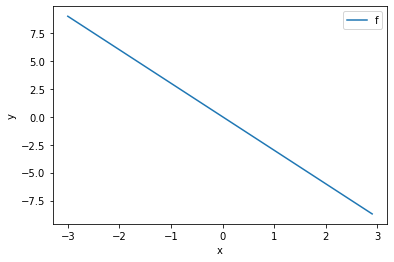

In [22]:
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Let us add some noise to the data in order to simulate the real data. Use <code>torch.randn(X.size())</code> to generate Gaussian noise that is the same size as <code>X</code> and has a standard deviation opf 0.1.

In [23]:
Y = f + 0.1 * torch.randn(X.size())

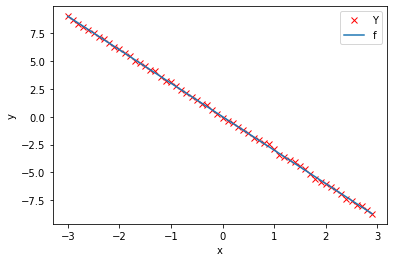

In [24]:
plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Next, we will create our model.

In [25]:
def forward(x):
    return w * x + b

And then we will define our cost function which is the mean squared error.

In [26]:
def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

Then we will randomly initialize our weight and bias.

In [27]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

Then we will fix a value for our learning rate. We will keep a separte list to keep losses at each epoch.

<Figure size 432x288 with 0 Axes>

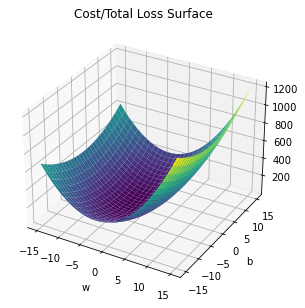

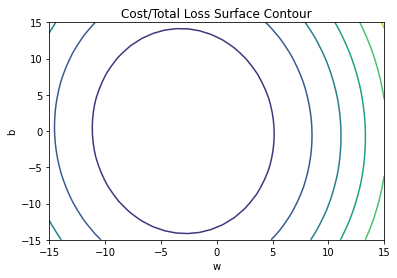

In [28]:
lr = 0.1
LOSS = []
get_surface = plot_error_surfaces(15, 15, X, Y, 30)

Finally, we will train our model.

In [29]:
def train_model(iter):
    for epoch in range(iter):
        Yhat = forward(X)
        loss = criterion(Yhat, Y)
        LOSS.append(loss)
        
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        if epoch % 3 == 0:
            get_surface.plot_ps()
        
        loss.backward()
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        w.grad.data.zero_()
        b.grad.data.zero_()

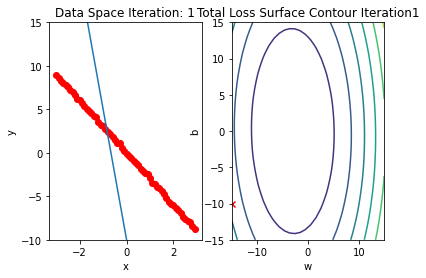

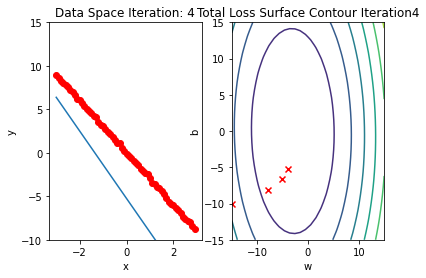

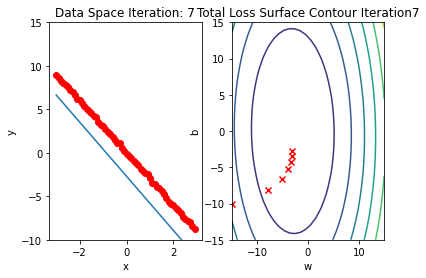

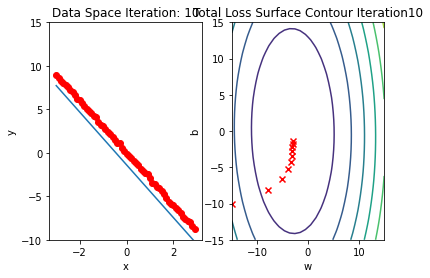

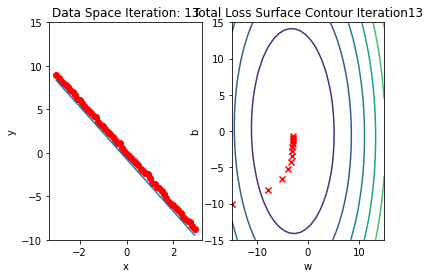

In [30]:
train_model(15)

# PyTorch Way
Let's create a custom `Dataset` and a `DataLoader`.

In [31]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.f = 1 * self.x - 1
        self.y = self.f + 0.1 * torch.randn(self.x.size())
        self.len = self.x.shape[0]
        
    def __getitem__(self,index):    
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

Initialize the `Data`.

In [32]:
dataset = Data()

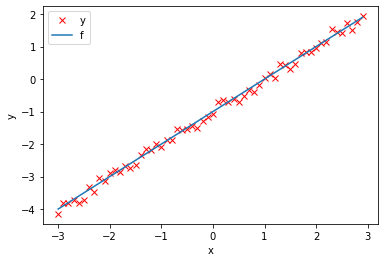

In [33]:
plt.plot(dataset.x.numpy(), dataset.y.numpy(), 'rx', label = 'y')
plt.plot(dataset.x.numpy(), dataset.f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [34]:
class LinearRegression(Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = Linear(input_size, output_size)
        
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

We will use PyTorch build-in functions to create a criterion function; this calculates the total loss or cost.

In [35]:
criterion = MSELoss()

In [36]:
model = LinearRegression(1, 1)
optimizer = SGD(model.parameters(), lr = 0.01)

In [37]:
list(model.parameters())

[Parameter containing:
 tensor([[0.1962]], requires_grad=True),
 Parameter containing:
 tensor([-0.6601], requires_grad=True)]

In [38]:
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'params': [0, 1]}]}

Create a `DataLoader` instance.

In [39]:
trainloader = DataLoader(dataset = dataset, batch_size = 1)
get_surface = plot_error_surfaces(15, 13, dataset.x, dataset.y, 30, go = False)

In [40]:
def train_model(iter):
    for epoch in range(iter):
        for i, (x, y) in enumerate(trainloader):
            yhat = model(x)
            loss = criterion(yhat, y)   
            print('Epoch ', epoch, ' round ', i, ' : Loss ', loss)    
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

train_model(10)

Epoch  0  round  0  : Loss  tensor(8.4165, grad_fn=<MseLossBackward0>)
Epoch  0  round  1  : Loss  tensor(4.1129, grad_fn=<MseLossBackward0>)
Epoch  0  round  2  : Loss  tensor(2.8266, grad_fn=<MseLossBackward0>)
Epoch  0  round  3  : Loss  tensor(1.8060, grad_fn=<MseLossBackward0>)
Epoch  0  round  4  : Loss  tensor(1.6369, grad_fn=<MseLossBackward0>)
Epoch  0  round  5  : Loss  tensor(1.1853, grad_fn=<MseLossBackward0>)
Epoch  0  round  6  : Loss  tensor(0.3396, grad_fn=<MseLossBackward0>)
Epoch  0  round  7  : Loss  tensor(0.5414, grad_fn=<MseLossBackward0>)
Epoch  0  round  8  : Loss  tensor(0.0887, grad_fn=<MseLossBackward0>)
Epoch  0  round  9  : Loss  tensor(0.1945, grad_fn=<MseLossBackward0>)
Epoch  0  round  10  : Loss  tensor(0.0609, grad_fn=<MseLossBackward0>)
Epoch  0  round  11  : Loss  tensor(0.0440, grad_fn=<MseLossBackward0>)
Epoch  0  round  12  : Loss  tensor(0.1257, grad_fn=<MseLossBackward0>)
Epoch  0  round  13  : Loss  tensor(0.0479, grad_fn=<MseLossBackward0>)
Ep